In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten

from skimage import color

#img = color.rgb2gray(io.imread('image.png'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 16s 0us/step


In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale, cmap='gray')

    plt.show()

Funcion para convertir las imagenes a escala de grises:


```
color.rgb2gray( <image> )
```



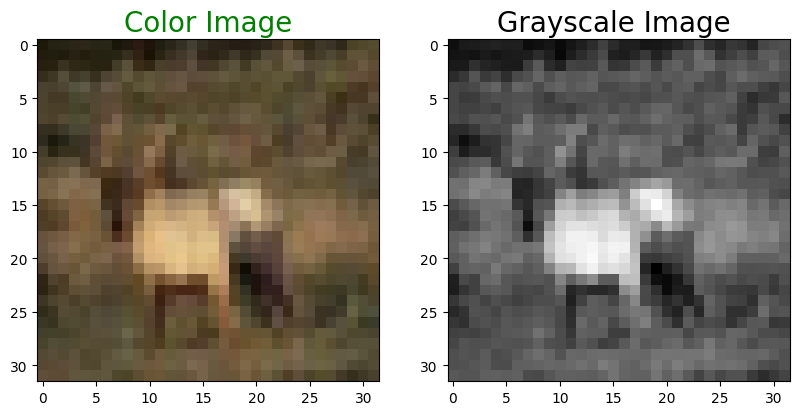

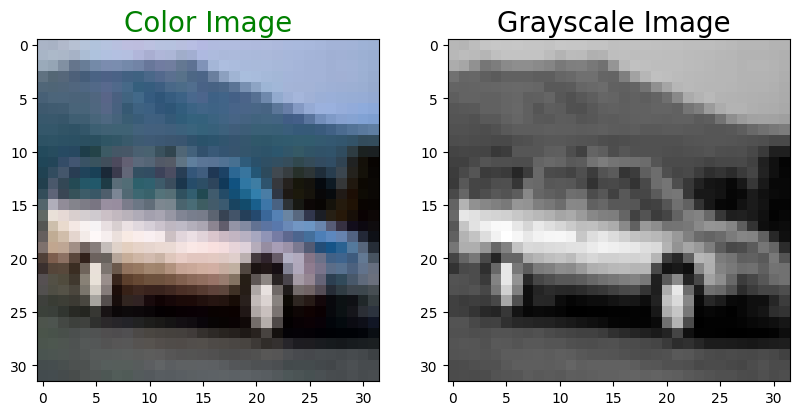

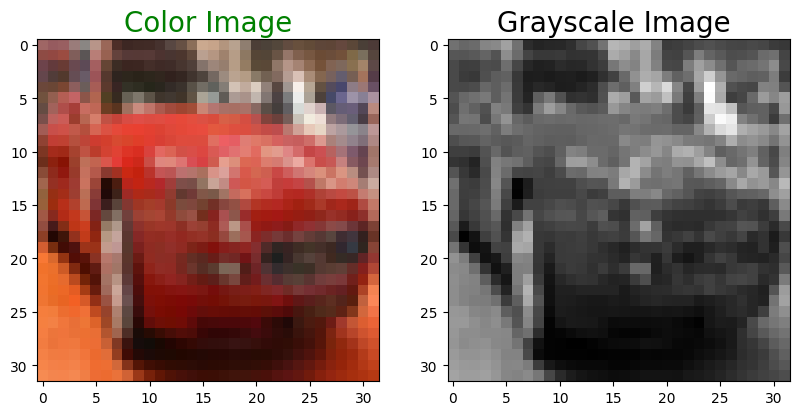

In [ ]:
for i in range(3,6):
  plot_images(x_train[i],color.rgb2gray(x_train[i]))

## Enunciado de la práctica 1

Para esta práctica hemos creido necesario que se debe poner en práctica todo lo impartido hasta la fecha, es decir, no solo las arquitecturas impartidad sino tambien las diferentes tipologías de redes mostrada hasta el momento.

Para ello, mediante el dataset anterior queremos implementar un modelo capaz de frente a una entrada de imagenes en blanco y negro, sea capaz de colorearlas. De esta manera se establecen los siguiente puntos:


1.   Implementar la arquitectura mediante redes MLP
2.   Implementar la arquitectura mediante redes Convolucionales
3.   (Opcional) Probar diferentes arquitecturas CNN que puedan mejorar lo resultados.



## Ejercicio_1


In [ ]:
grey_xtrain= color.rgb2gray(x_train)
grey_xtest= color.rgb2gray(x_test)
# Normalizacion
grey_xtrain= grey_xtrain/255
grey_xtest= grey_xtest/255


grey_xtrain1=grey_xtrain.reshape((50000, 1024)).astype('float32')
grey_xtest1=grey_xtest.reshape((10000, 1024)).astype('float32')

grey_xtrain1.shape

(50000, 1024)

In [ ]:
y_train1= y_train.reshape(-1)
y_test1=y_test.reshape(-1)

y_train1=to_categorical(y_train1)
y_test1=to_categorical(y_test1)


In [ ]:
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential()

# Capas densas
model.add(Dense(1024, input_shape=(1024,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(grey_xtrain1, y_train1, validation_data=(grey_xtest1, y_test1), epochs=50, batch_size=100)

Epoch 1/50
500/500 [==============================] - 8s 5ms/step - loss: 2.1304 - accuracy: 0.1972 - val_loss: 2.0889 - val_accuracy: 0.2225
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 2.0412 - accuracy: 0.2459 - val_loss: 2.0362 - val_accuracy: 0.2546
Epoch 3/50
500/500 [==============================] - 2s 5ms/step - loss: 1.9530 - accuracy: 0.2930 - val_loss: 1.9049 - val_accuracy: 0.3191
Epoch 4/50
500/500 [==============================] - 2s 5ms/step - loss: 1.8985 - accuracy: 0.3163 - val_loss: 1.8726 - val_accuracy: 0.3286
Epoch 5/50
500/500 [==============================] - 3s 6ms/step - loss: 1.8648 - accuracy: 0.3285 - val_loss: 1.8353 - val_accuracy: 0.3480
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 1.8351 - accuracy: 0.3387 - val_loss: 1.8248 - val_accuracy: 0.3477
Epoch 7/50
500/500 [==============================] - 3s 5ms/step - loss: 1.8183 - accuracy: 0.3442 - val_loss: 1.7956 - val_accuracy: 0.3557
Epoch 

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

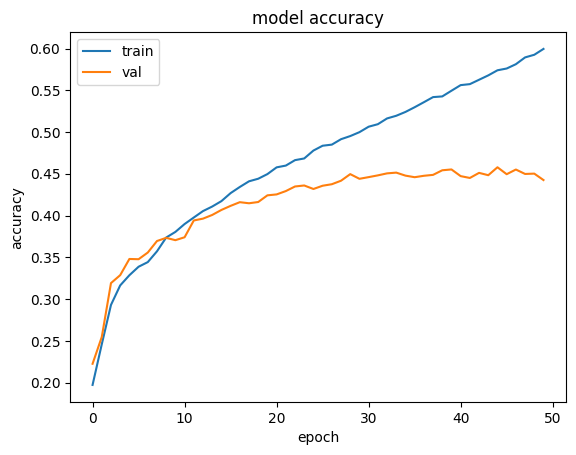

In [ ]:
#Después de haber entrenado al modelo se realiza un analisis del mismo a traves de las graficas
#Para poder observar si se ha producido un overfitting o un underfitting en nuestro modelo
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

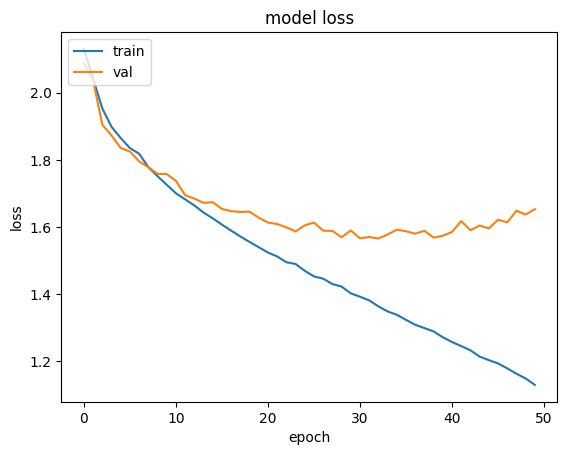

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# evaluación final del modelo a través de la metrica accuracy
scores = model.evaluate(grey_xtest1, y_test1, verbose=0)
print("accuracy: %.2f%%" % (scores[1]*100))

accuracy: 44.25%


#Ejercicio_2

In [ ]:
#Preparamos los datos para la red
ytrain_car=to_categorical(y_train)
ytest_car=to_categorical(y_test)

grey_xtrain=np.expand_dims(grey_xtrain, -1)
grey_xtest=np.expand_dims(grey_xtest, -1)

grey_xtrain.shape

(50000, 32, 32, 1)

In [ ]:
def create_model():
  # Creacion del modelo
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu', padding='same'))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
  model.add(MaxPool2D((5, 5)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='sigmoid'))
  #Compilacion
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       102528    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
# Entrenamiento del modelo
history=model.fit(grey_xtrain, ytrain_car, validation_data=(grey_xtest, ytest_car), epochs=100, batch_size=200)

Epoch 1/100
250/250 [==============================] - 3s 10ms/step - loss: 0.2481 - accuracy: 0.4178 - val_loss: 0.2482 - val_accuracy: 0.4178
Epoch 2/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2451 - accuracy: 0.4267 - val_loss: 0.2447 - val_accuracy: 0.4331
Epoch 3/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2427 - accuracy: 0.4332 - val_loss: 0.2424 - val_accuracy: 0.4353
Epoch 4/100
250/250 [==============================] - 3s 12ms/step - loss: 0.2401 - accuracy: 0.4443 - val_loss: 0.2406 - val_accuracy: 0.4441
Epoch 5/100
250/250 [==============================] - 3s 11ms/step - loss: 0.2377 - accuracy: 0.4510 - val_loss: 0.2391 - val_accuracy: 0.4481
Epoch 6/100
250/250 [==============================] - 2s 10ms/step - loss: 0.2358 - accuracy: 0.4559 - val_loss: 0.2376 - val_accuracy: 0.4518
Epoch 7/100
250/250 [==============================] - 2s 10ms/step - loss: 0.2334 - accuracy: 0.4636 - val_loss: 0.2357 - val_accuracy:

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

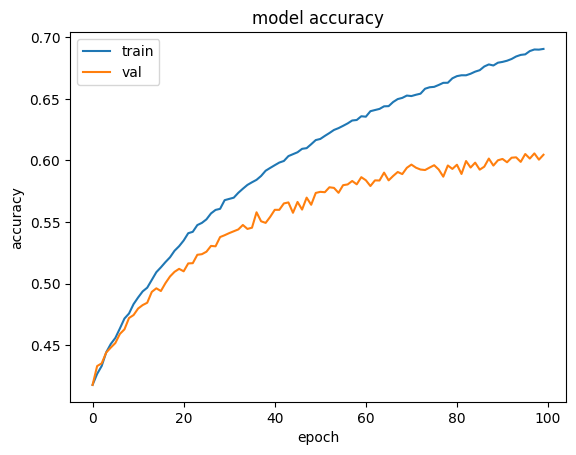

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

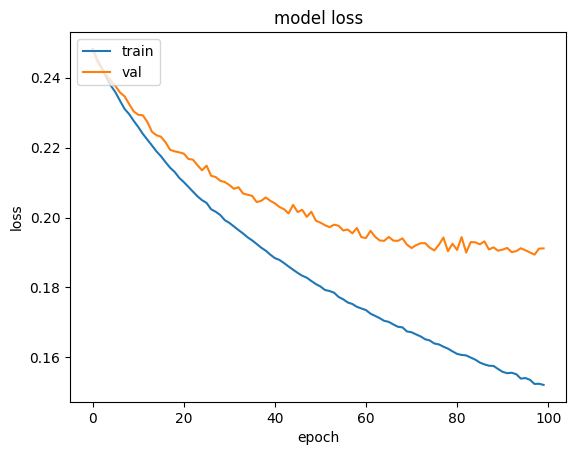

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# evaluación final del modelo a través de la metrica accuracy
scores = model.evaluate(grey_xtest, ytest_car, verbose=0)
print("accuracy: %.2f%%" % (scores[1]*100))

accuracy: 60.46%


#Ejercicio_3

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
conv_base.trainable = False

In [ ]:
from keras import models
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14781642 (56.39 MB)
Trainable params: 66954 (261.54 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Configuración del modelo para entrenamiento

from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

In [ ]:
# #Preparamos los datos para la red
# ytrain_car=to_categorical(y_train)
# ytest_car=to_categorical(y_test)

# grey_xtrain=np.expand_dims(grey_xtrain, -1)
# grey_xtest=np.expand_dims(grey_xtest, -1)

grey_xtrain.shape

(50000, 32, 32, 1)

In [ ]:
import numpy as np
grey_xtrain_rgb = np.repeat(grey_xtrain, 3, axis=-1)
grey_xtest_rgb = np.repeat(grey_xtest, 3, axis=-1)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
history = model.fit(grey_xtrain_rgb, ytrain_car,steps_per_epoch=100, epochs=50,  validation_data=(grey_xtest_rgb, ytest_car), validation_steps=50)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
100/100 [==============================] - 31s 247ms/step - loss: 0.5969 - accuracy: 0.0997 - val_loss: 0.4762 - val_accuracy: 0.1000
Epoch 2/50
100/100 [==============================] - 22s 217ms/step - loss: 0.3982 - accuracy: 0.1000 - val_loss: 0.3428 - val_accuracy: 0.1000
Epoch 3/50
100/100 [==============================] - 21s 209ms/step - loss: 0.3293 - accuracy: 0.1000 - val_loss: 0.3251 - val_accuracy: 0.1000
Epoch 4/50
100/100 [==============================] - 22s 219ms/step - loss: 0.3251 - accuracy: 0.0998 - val_loss: 0.3251 - val_accuracy: 0.1000
Epoch 5/50
 30/100 [========>.....................] - ETA: 13s - loss: 0.3251 - accuracy: 0.0987

KeyboardInterrupt: ignored

La metrica accuracy no solo es extremadamente baja sino que no mejora. Se realizaran cambios en el modelo para que la arquitectura del modelo 3 funcione de manera correcta.